### **프로젝트 주제**

코로나 적응기 속 불안하고 지친 마음을 힐링하기 위한 국내 관광지,숙소 분석 및 웹 서비스

### **프로젝트 기간**

22/01/17 - 22/01/21

### **재미진조 구성원**

- 조장: 김미나
- 조원: 김진아, 정재은, 김진영

### **목차**

1. 주제 선정 및 계획 수립과정
2. 데이터 설명
3. 프로젝트 과정
4. 느낀 점

----------------------------------------------------------------------------------------------------------------------------------------------------

### **1. 주제 선정 및 계획 수립과정**

##### 코로나 적응기로 해외 여행도 마음대로 가지못하고 집콕 감성만 누리고 있는 지금, 비대면 관광이 가능한 곳으로 떠나고 싶어 주제를 선정하게 되었습니다.



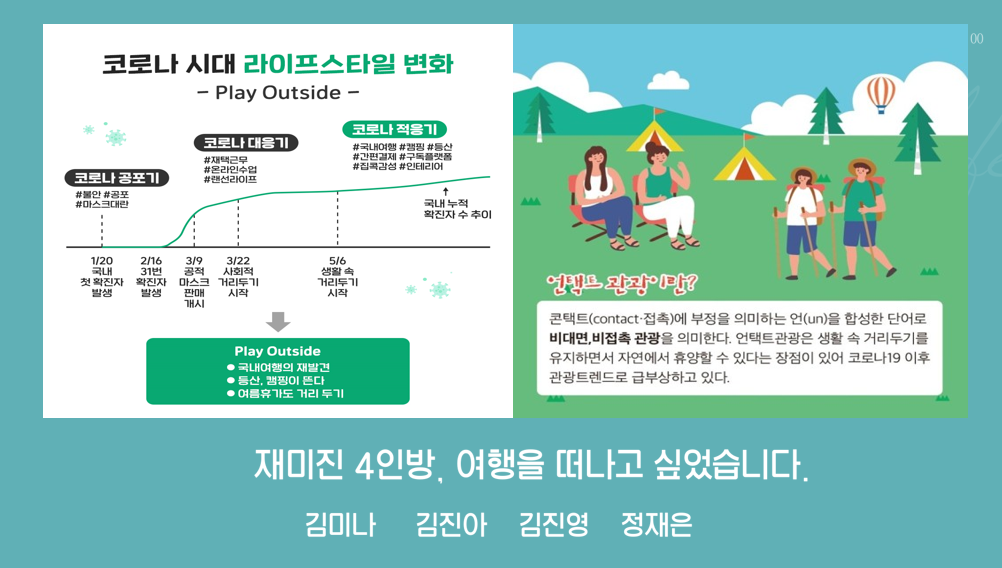

In [1]:
# 주제 선정
from IPython.display import Image
Image("untact1.png")

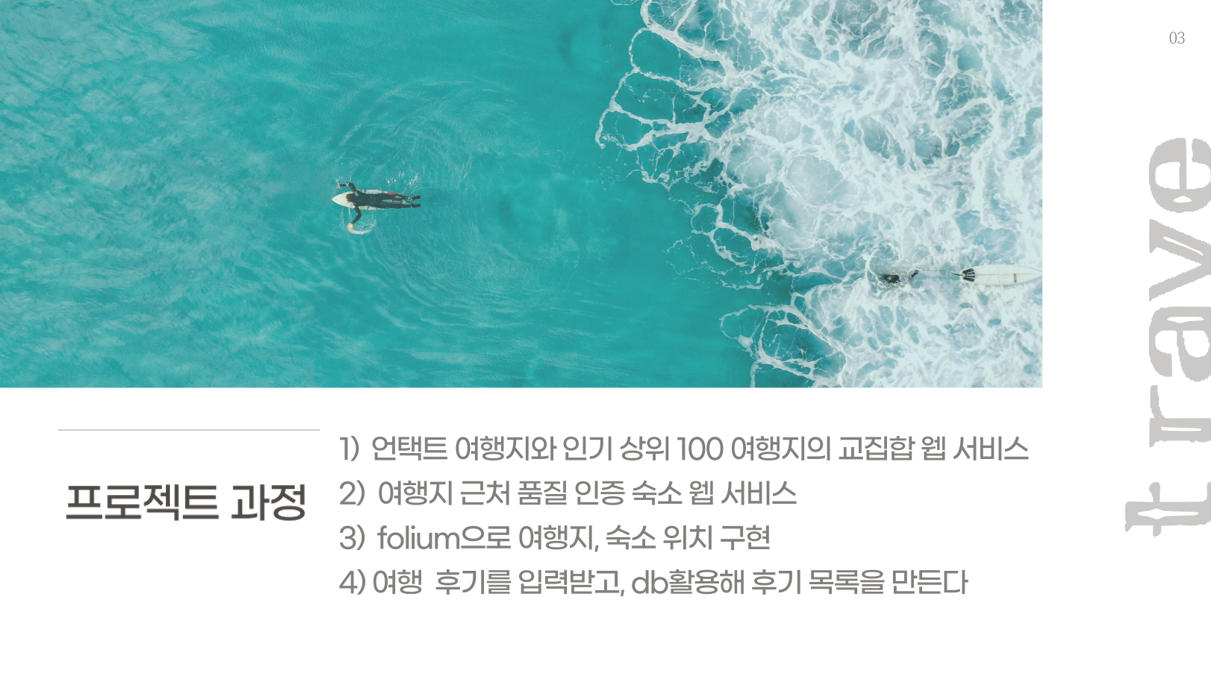

In [3]:
# 계획 수립 과정
from IPython.display import Image
Image("untact2.png")

### **2. 데이터 설명**

한국관광공사 운영하는 '대한민국 구석구석' 국내 여행 정보 웹페이지의 언택트 관광지 100선, 인기순 여행지 100개, 품질인증 숙소 데이터를 이용했습니다

### **3. 프로젝트 과정**

In [2]:
# 필요 라이브러리 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import re
import time  
import pandas as pd
import csv

#### 1) 언택트 관광지 100선 데이터 수집 및 전처리

In [12]:
# 셀레니움 웹드라이버로 페이지 호출 + bs파싱
wb = webdriver.Chrome("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트2/코드/chromedriver") 
wb.set_window_size(1920, 1080)
wb.get("https://korean.visitkorea.or.kr/detail/rem_detail.do?cotid=351f6cf4-d984-496f-886d-6fc538b226a7")
html = wb.page_source
soup = BeautifulSoup(html,"lxml")

/var/folders/l1/r8dpkh1167d7xqgds5d9qyc00000gn/T/ipykernel_8818/3636914754.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wb = webdriver.Chrome("/Users/mac/Desktop/아시아경제/project_fun/chromedriver")


In [13]:
# 각 리스트의 길이 100으로 동일하며 순서도 동일합니다.
# 언택트 관광지 100선 - 상세페이지 url리스트 만들기
url_untact100 = [] 
url_table = soup.find('ul',{"class":"con_body_ul"}).find_all("a")

for i in range(len(url_table)):
    try:
        url_untact100.append(url_table[i]["href"])
    except:
        pass

#url_untact100

# 언택트 관광지 100선 - 위치와 이름 리스트
table_a = []
for i in range(len(url_table)):
    temp = re.findall(r"\S+(?:\s\S+)*", url_table[i].get_text())
    table_a.append(temp)
    
#table_a

# 언택트 관광지 100선 - 이미지 url리스트 만들기
img_url_untact100 = []

res = soup.find('script',{"id":"schema"}).text
img_url = re.findall(r'(?<=background-image:url).*?(?=;)', res)
for i in range(len(img_url)):
    try:
        img_url_untact100.append((img_url[i].strip("('")).strip(")'"))
    except:
        pass

#img_url_untact100    

# 언택트 관광지 100선 - 관광지/위치/카카오맵 위경도 추출
schema = soup.find('script',{"id":"schema"}).text
title = re.findall(r'(?<=.{title: \').*?(?=\')', schema)
region = re.findall(r'(?<=region_nm: \').*?(?=\')', schema)
latlng_pre = re.findall(r'(?<=\', latlng: new kakao.maps.LatLng).*?(?=, region_nm:)', res)
latlng = []
for i in range(len(latlng_pre)):
    latlng.append((latlng_pre[i].strip("(")).strip(")"))
wb.close()

In [14]:
# 주소만 추출하기
untact_address = []
for i in range(len(table_a)):
    tmp = table_a[i]
    untact_address.append(tmp[2])
untact_address

['동두천자연휴양림',
 '한탄강주상절리길',
 '여강길',
 '잣향기푸른숲',
 '바람새마을 소풍정원',
 '평화누리공원',
 '행주산성역사공원',
 '갯골생태공원',
 '김포 평화누리길 1코스',
 '곤지암 리조트 힐링캠퍼스',
 '호미반도해안둘레길',
 '금오산 올레길',
 '경천대전망대',
 '진남교반',
 '벌영리메타세콰이어길',
 '낙강물길공원',
 '성밖숲',
 '국립백두대간수목원',
 '등기산스카이워크',
 '행남해안산책로',
 '대청호 오백리길',
 '계족산 황톳길',
 '국립 대전현충원',
 '수통골',
 '장태산 자연휴양림',
 '한밭수목원',
 '만인산 자연휴양림',
 '뿌리공원',
 '상소동 산림욕장',
 '식장산 문화공원',
 '장산',
 '황령산',
 '다대포해수욕장',
 '아미르공원',
 '평화공원',
 '회동수원지',
 '치유의 숲',
 '구덕야영장',
 '대저생태공원',
 '아차산',
 '배봉산',
 '북정마을',
 '안산(무악산)',
 '돈의문박물관마을',
 '국립4.19민주묘지',
 '평화문화진지',
 '서울함 공원',
 '양천향교',
 '몽촌토성',
 '교동도',
 '석모도',
 '동검도',
 '신도·시도·모도',
 '굴업도',
 '이작도',
 '선녀바위·거잠포',
 '송도 센트럴파크',
 '계양산 둘레길',
 '경인아라뱃길',
 '서건도',
 '거문오름',
 '휴림',
 '물영아리오름',
 '고살리 숲길',
 '신풍리 밭담길',
 '북촌리 4.3길',
 '천아숲길',
 '무릉 자전거 도로',
 '정물오름',
 '논골담길',
 '의암호 자전거길',
 '이사부길',
 '오대호아트팩토리',
 '만뢰산자연생태공원',
 '갈론계곡(갈론구곡)',
 '고복자연공원',
 '조천연꽃공원',
 '운주산성',
 '웅도',
 '칠갑산도립공원',
 '예산황새공원',
 '장수누리파크',
 '교룡산국민관광지',
 '고산창포마을',
 '펭귄마을',
 '광주호호수생태원',
 '시민의 숲 야영장',
 '서산동 보리마당&시화마을',
 '우수영',
 '우주

In [117]:
# csv로 내보내기
df = pd.DataFrame(list(zip(untact_address, region,url_untact100,img_url_untact100,latlng)),
                  columns =['여행지','주소','상세페이지','이미지주소','위도 경도'])
df.to_csv("untact.csv")

#### 2) 인기도순 여행지 100위 데이터 수집 및 전처리

In [66]:
# 셀레니움 웹드라이버로 페이지 호출 + 빈리스트 변수지정
wb = webdriver.Chrome("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트2/코드/chromedriver")  
wb.set_window_size(1920, 1080)
wait = WebDriverWait(wb, 30) 
wb.get("https://korean.visitkorea.or.kr/list/ms_list.do?choiceTag=여행지&choiceTagId=")
wb.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div[1]/div/button[3]").click() # 인기순 버튼 누르기
sight = [] # 여행지 리스트
sight_loc= [] # 여행지 위치 리스트
sight_tag = [] # 태그 리스트
sight_url=[] # 상세페이지 리스트

/var/folders/l1/r8dpkh1167d7xqgds5d9qyc00000gn/T/ipykernel_8818/4165043853.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wb = webdriver.Chrome("/Users/mac/Desktop/아시아경제/project_fun/chromedriver")


In [67]:
# bs파싱 + 각 페이지에서 가져오기 (대략 1분30초 소요)
# 각 리스트의 길이 100으로 동일하며 순서도 동일합니다.

wait = WebDriverWait(wb, 10)
c = 0

for c in range(10):
    c += 1
    wait.until(EC.element_to_be_clickable((By.XPATH, f"/html/body/div[2]/div[2]/div[1]/div[2]")))
    time.sleep(5)
    wb.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div[2]").find_element(By.ID,f'{c}').click()
    time.sleep(5)

    html = wb.page_source
    soup = BeautifulSoup(html,"lxml")
    fav = soup.find('ul',{"class":"list_thumType flnon"})
    fav_li = fav.find_all("li")
    n=0

    for i in range(10):
        tmp = fav_li[n]
        for j in range(1):
            sight.append((tmp.find_all("a")[1]).text)
        for k in range(1):
            sight_loc.append((tmp.find("p")).text)
        for l in range(1):
            sight_tag.append(tmp.find("p",{"class":"tag"}).text)
        for a in range(1):
            raw = tmp.find("div",{"class":"photo"}).find("a")["onclick"]
            cotid = raw.split('"')
            try:
               sight_url.append("https://korean.visitkorea.or.kr/detail/ms_detail.do?cotid=" + cotid[1])
            except:
                pass
        n+=4
    print(c,end=" ")
wb.close()

1 2 3 4 5 6 7 8 9 10 

In [59]:
# 각 상세 페이지에서 정보 가져오기
wb = webdriver.Chrome("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트2/코드/chromedriver") 
wb.set_window_size(1920, 1080)
wait = WebDriverWait(wb, 5)
sight_info = [] # 세부사항 html
sight_address = [] # 여행지 주소 리스트
sight_desc = [] # 여행지 상세설명

for i in range(len(sight_url)):
    wb.get(sight_url[i])
    try:        
        wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[5]/div[2]/div/div[2]/button")))
        wb.find_element(By.XPATH,"/html/body/div[3]/div[2]/div[5]/div[2]/div/div[2]/button").click()
    except:
        pass
    time.sleep(1)
    try:  
        wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[5]/div[4]/div/div[2]/button")))
        wb.find_element(By.XPATH,"/html/body/div[3]/div[2]/div[5]/div[4]/div/div[2]/button").click()
    except:
        pass 
    time.sleep(3)
    html = wb.page_source
    soup = BeautifulSoup(html,"lxml")

    sight_address.append(soup.find("span",{"class":"area"}).text.replace('\n'," ").replace('\t'," ").strip())
    try:
        sight_info.append(soup.find("div",{"class":"area_txtView bottom on"}))
    except:
        sight_info.append(soup.find("div",{"class":"area_txtView bottom"}))
    try:
        sight_desc.append(soup.find("div",{"class":"area_txtView top ms_detail on"}).text.replace('\n'," ").replace('\t'," ").strip("   내용 닫기 "))
    except:
        sight_desc.append(soup.find("div",{"class":"area_txtView top ms_detail"}).text.replace('\n'," ").replace('\t'," ").strip("   내용 닫기 "))
    print(i+1,end=" ")

wb.close()

/var/folders/l1/r8dpkh1167d7xqgds5d9qyc00000gn/T/ipykernel_8818/1980033824.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wb = webdriver.Chrome("/Users/mac/Desktop/아시아경제/project_fun/chromedriver")


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [60]:
# csv로 내보내기
df = pd.DataFrame(list(zip(sight,sight_url,sight_address,sight_desc,sight_tag,sight_info)),
                  columns =['여행지','상세페이지','주소','여행지상세정보','여행지태그','상세정보 html'])
df.to_csv("sight.csv")

In [127]:
# 태그리스트 #제거 (인기100선의 전체태그가 리스트안의 리스트로 묶여 있음 / 워드클라우드 용)
sight_tag_f = []

for i in range(len(sight_tag)):
    tmp = []
    tmp.append(sight_tag[i].split("#"))
    for j in range(len(tmp)):
        if tmp[j] != '':
            sight_tag_f.append(tmp[j])
        else:
            pass
df = pd.DataFrame(sight_tag_f)
df.to_csv("sight_tag_f.csv")

#### 3) 한국관광품질인증 숙소 데이터 수집 및 전처리

In [3]:
# 셀레니움 웹드라이버로 페이지 호출 + 빈리스트 변수지정
wb = webdriver.Chrome("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트2/코드/chromedriver")  
wb.set_window_size(1920, 1080)
wait = WebDriverWait(wb, 30) 
wb.get("https://korean.visitkorea.or.kr/list/ms_list.do?choiceTag=여행지&choiceTagId=")
wait.until(EC.element_to_be_clickable((By.XPATH,"/html/body/div[2]/div[2]/div[2]/div[2]/ul[4]/li[31]/button/span")))
wb.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[2]/div[2]/ul[4]/li[31]/button/span").click()
acc = [] # 숙소 리스트
acc_loc = [] # 숙소 위치 리스트
acc_tag = [] # 숙소 태그 리스트
acc_url = [] # 상세페이지 리스트

/var/folders/l1/r8dpkh1167d7xqgds5d9qyc00000gn/T/ipykernel_71139/717169636.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wb = webdriver.Chrome("/Users/mac/Desktop/아시아경제/project_fun/chromedriver")


In [4]:
# bs파싱 + 각 페이지에서 가져오기 (대략 6분 소요)
# 각 리스트의 길이 468로 동일하며 순서도 동일합니다.

wait = WebDriverWait(wb, 10)
c = 0

for c in range(47):
    c += 1
    wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[1]/div[2]")))
    time.sleep(2)
    wb.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div[2]").find_element(By.ID,f'{c}').click()
    time.sleep(3)

    html = wb.page_source
    soup = BeautifulSoup(html,"lxml")
    fav = soup.find('ul',{"class":"list_thumType flnon"})
    fav_li = fav.find_all("li")
    n=0

    for i in range(10):
        try:
            tmp = fav_li[n]
            for j in range(1):
                acc.append((tmp.find_all("a")[1]).text.strip("[한국관광 품질인증/Korea Quality]"))
            for k in range(1):
                acc_loc.append((tmp.find("p")).text)
            for l in range(1):
                acc_tag.append(tmp.find("p",{"class":"tag"}).text)
            for a in range(1):
                raw = tmp.find("div",{"class":"photo"}).find("a")["onclick"]
                cotid = raw.split('"')
                try:
                   acc_url.append("https://korean.visitkorea.or.kr/detail/ms_detail.do?cotid=" + cotid[1])
                except:
                    pass
            n+=4
        except:
            pass
    print(c,end=" ")
wb.close()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

In [6]:
# 각 상세 페이지에서 정보 가져오기
# 각 리스트의 길이 468로 동일하며 순서도 동일합니다.
# 오래 걸립니다. (대략 1시간)

wb = webdriver.Chrome("C:/Users/minak/OneDrive/바탕 화면/프로젝트/미니 프로젝트2/코드/chromedriver")  
wb.set_window_size(1920, 1080)
wait = WebDriverWait(wb, 3)
acc_info = []
acc_address = []
acc_desc = []

for i in range(len(acc_url)):
    wb.get(acc_url[i])
    try:        
        wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[5]/div[2]/div/div[2]/button")))
        wb.find_element(By.XPATH,"/html/body/div[3]/div[2]/div[5]/div[2]/div/div[2]/button").click()
    except:
        pass
    time.sleep(2)
    try:  
        wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[3]/div[2]/div[5]/div[4]/div/div[2]/button")))
        wb.find_element(By.XPATH,"/html/body/div[3]/div[2]/div[5]/div[4]/div/div[2]/button").click()
    except:
        pass 
    time.sleep(5)
    html = wb.page_source
    soup = BeautifulSoup(html,"lxml")
    try:
        acc_address.append(soup.find("span",{"class":"area"}).get_text())
    except:
        try:
            acc_address.append(soup.find("div",{"class":"area_txtView bottom on"}).find_all("li")[2].get_text().replace('\n'," ").replace('\t'," ").strip("주소"))
        except:
            acc_address.append(soup.find("div",{"class":"area_txtView bottom"}).find_all("li")[2].get_text().replace('\n'," ").replace('\t'," ").strip("주소"))      
    try:
        acc_info.append(soup.find("div",{"class":"area_txtView bottom on"}))
    except:
        acc_info.append(soup.find("div",{"class":"area_txtView bottom"}))
    try:
        acc_desc.append(soup.find("div",{"class":"area_txtView top ms_detail on"}).text.replace('\n'," ").replace('\t'," ").strip("   내용 닫기 "))
    except:
        acc_desc.append(soup.find("div",{"class":"area_txtView top ms_detail"}).text.replace('\n'," ").replace('\t'," ").strip("   내용 닫기 "))
    
    print(i+1,end=" ")

wb.close()

/var/folders/l1/r8dpkh1167d7xqgds5d9qyc00000gn/T/ipykernel_71139/3799887548.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wb = webdriver.Chrome("/Users/mac/Desktop/아시아경제/project_fun/chromedriver")


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [10]:
# csv로 내보내기
df = pd.DataFrame(list(zip(acc,acc_url,acc_address,acc_desc,acc_tag,acc_info)),
                  columns =['숙소','상세페이지','주소','숙소상세정보','숙소태그','상세정보 html'])
df.to_csv("accomodation1.csv")
df

,숙소,상세페이지,주소,숙소상세정보,숙소태그,상세정보 html
0,더잭슨나인스호텔,https://korean.visitkorea.or.kr/detail/ms_deta...,강원도 춘천시 중앙로 193,"더잭슨나인스호텔은 춘천 공지천 사거리에 자리한 지하 4층, 지상 16층 규모의 대형...",#강원숙소#강원추천숙소#강원춘천#강원품질인증숙소#더잭슨나인스호텔#숙박#숙소#아이와함...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
1,스테이 앤드 스튜디오 여여재,https://korean.visitkorea.or.kr/detail/ms_deta...,충청남도 태안군 남면 몽대로 448,스테이 앤드 스튜디오 여여재는 태안 몽산포항에서 1km 거리에 있는 붉은 벽돌의 복...,#바다가보이는#바비큐장이있는#반려동물과함께#반려동물동반품질인증업소#숙박#숙소#스테이...,None
2,주식회사제이스퀘어호텔,https://korean.visitkorea.or.kr/detail/ms_deta...,경상남도 진주시 솔밭로 107,제이스퀘어호텔은 진주시청 맞은편에 있는 호텔이다. 건물의 1층부터 4층은 웨딩홀과 ...,#경남숙소#경남진주#경남추천숙소#경남품질인증숙소#맛있는조식이있는#숙박#숙소#우수숙소...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
3,뉴라온스테이,https://korean.visitkorea.or.kr/detail/ms_deta...,경상남도 진주시 영천강로 166,"뉴라온스테이는 경남진주혁신도시의 공공기관과 걸어서 5~10분 거리에 위치, 비즈니스...",#경남숙소#경남진주#경남추천숙소#경남품질인증숙소#뉴라온스테이#대중교통으로갈수있는#맛...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
4,하운드호텔 부산역점,https://korean.visitkorea.or.kr/detail/ms_deta...,부산광역시 동구 중앙대로236번길 9,하운드호텔 부산역점은 부산 교통의 중심지에 위치한 호텔이다. 부산 지하철 1호선 부...,#대중교통으로갈수있는#부산동구#부산숙소#부산추천숙소#부산품질인증숙소#수영장이있는#숙...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
...,...,...,...,...,...,...
463,월강고택(최씨고가),https://korean.visitkorea.or.kr/detail/ms_deta...,경상남도 산청군 단성면 지리산대로2897번길 8-7,"최씨고가가 위치한 남사예담촌(南沙예담村)은 지리산 초입, 천혜의 자연환경에 둘러싸인...",#KQ인증을받은#개별독채가있는#게스트하우스월강고택#경남추천숙소#경남품질인증숙소#남사...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
464,석정댁,https://korean.visitkorea.or.kr/detail/ms_deta...,경상북도 고령군 쌍림면 개실2길 6,개실마을에 자리한 석정댁은 전체를 독채로 빌려주는 한옥 민박집이다. 따라서 다른 이...,#개별독채가있는#개실마을영농조합법인석정댁#객실내취사가능#게스트하우스석정댁#경북추천숙...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
465,표충재 전통체험,https://korean.visitkorea.or.kr/detail/ms_deta...,대구광역시 동구 신숭겸길 17,표충재 전통한옥은 대구시 동구에 위치한 신숭겸장군 유적지 내에 자리한다. 신숭겸장군...,#대구숙소#대구추천숙소#대구품질인증숙소#비대면안심관광지인근품질인증숙소#숙박#숙소#신...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."
466,목향재,https://korean.visitkorea.or.kr/detail/ms_deta...,세종특별자치시 만남로6길 33,‘나무 향기가 피어오르는 집’이라는 뜻을 지닌 목향재는 한옥 체험 펜션이다. 아파트...,#게스트하우스목향재#목향재#목향재게스트하우스#목향재한옥#세종추천숙소#세종품질인증숙소...,"[\n, [\n, [\n, <ul><li><strong>문의 및 안내</strong..."


In [126]:
# 태그리스트 #제거 (인기100선의 전체태그가 리스트안의 리스트로 묶여 있음 / 워드클라우드 용)
acc_tag_f = []

for i in range(len(acc_tag)):
    tmp = []
    tmp.append(acc_tag[i].split("#"))
    for j in range(len(tmp)):
               acc_tag_f.append(tmp[j])
df = pd.DataFrame(acc_tag_f)
df.to_csv("acc_tag_f.csv")

#### 4) 언택트 여행지 100선 + 인기도순 100 중복값 반환

In [61]:
from collections import Counter
tmp_list = sight+untact_address
redund = []
result = Counter(tmp_list)
for key, value in result.items():
    if value >= 2:
        redund.append(key)
redund


['웅도',
 '낙강물길공원',
 '송도 센트럴파크',
 '바람새마을 소풍정원',
 '잣향기푸른숲',
 '동두천자연휴양림',
 '등기산스카이워크',
 '진남교반',
 '수선사',
 '굴업도',
 '석모도']